## Basic logistic regression model on token level probabilistic features used by Genaios

### Perplexity 
is one of the most common metrics for evaluating language models with sequence $X$ and tokens $x_i$ :
$$\text{PPL}(X) = \exp \left\{ - \frac{1}{t} \sum_{i}^{t} \log p_{\theta}(x_i|x_{<i}) \right\}$$

In [126]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import io
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [76]:
data_path = "data/transformed_data01.jsonl" # use absolute path if this doesn't work 
with open(data_path, 'r', encoding='utf-8') as f:
  file_content = f.read()
df = pd.read_json(io.StringIO(file_content), lines=True)
df.head()

,text,features,label
0,Giving gifts should always be enjoyable. Howe...,"{'observed': -3.168376684188842, 'perplexity':...",1
1,Yveltal (Japanese: ユベルタル) is one of the main a...,"{'observed': -3.00667142868042, 'perplexity': ...",1
2,If you'd rather not annoy others by being rude...,"{'observed': -3.068341732025146, 'perplexity':...",1
3,If you're interested in visiting gravesite(s) ...,"{'observed': -3.480255603790283, 'perplexity':...",1
4,The following are some tips for becoming succe...,"{'observed': -2.936430931091308, 'perplexity':...",1


In [58]:
human_df = df[df['label'] == 0].copy()
machine_df = df[df['label'] == 1].copy()

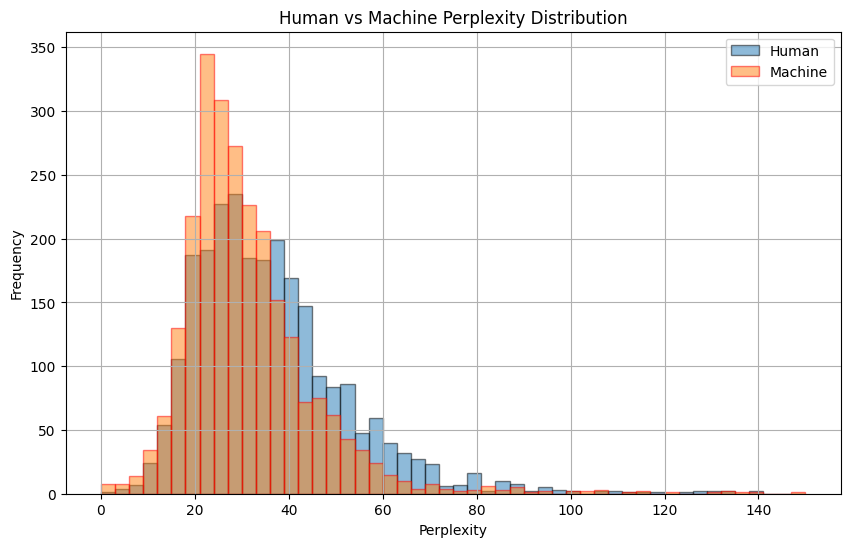

In [130]:
human_ppl = human_df['features'].apply(lambda x: x['perplexity'])
machine_ppl = machine_df['features'].apply(lambda x: x['perplexity'])

plt.figure(figsize=(10, 6))

plt.hist(human_ppl, bins=50, range=(0, 150), edgecolor='black', alpha=0.5, label='Human')
plt.hist(machine_ppl, bins=50, range=(0, 150), edgecolor='red', alpha=0.5, label='Machine')

plt.title('Human vs Machine Perplexity Distribution')
plt.xlabel('Perplexity')
plt.ylabel('Frequency')

plt.legend(loc='upper right')
plt.grid(True)

plt.show()

### Logistic Regression Model

In [128]:
feature_names = [
    "observed",
    "perplexity",
    "most_likely",
    "entropy",
    "median",
    "standard_deviation", 
    "mld", 
    "gini", 
]

X_features = []

for i, row in df.iterrows():
    feature_dict = row['features']
    feature_row = [feature_dict.get(name) for name in feature_names]

    X_features.append(feature_row)

X = np.array(X_features)
y = np.array(df['label'].values)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=18)

model = LogisticRegression(solver='liblinear', random_state=42)

print("training model...")
model.fit(X_train, y_train)

print("testing model...")
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("Scores:")
print(classification_report(y_test, y_pred, target_names=['Human (0)', 'Machine (1)']))

training model...
testing model...
Accuracy: 0.6900
Scores:
              precision    recall  f1-score   support

   Human (0)       0.67      0.68      0.68       478
 Machine (1)       0.71      0.70      0.70       522

    accuracy                           0.69      1000
   macro avg       0.69      0.69      0.69      1000
weighted avg       0.69      0.69      0.69      1000



/Users/koby/Desktop/MGT_TokProb/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/koby/Desktop/MGT_TokProb/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/koby/Desktop/MGT_TokProb/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


### Conclusion 
Team Genaios used token level probabilites of each token in a sequence as input for a transformer encoder. The approach above is a simplified one using average token level probability features as input for a logisitic regression model and will probably not achieve a lot more than an accuracy of 70%. This shows that the internal structure and sequential information is highly relevant and a reason of why the transformer encoder approach is a lot more perfomant. 

Options: 
 - try to copy what Genaios did 
 - try to combine token level probabilistic features with linguistic features 